# MixUp transform in Albumentations

In that transform we create weighted average of original and reference images. Transform also supports global_labels and masks

In [ ]:
import random

import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import numpy as np
import cv2

import albumentations as A

## Define a function to visualize an image

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
def load_rgb(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Load the image from the disk

In [ ]:
img_path = "../images/woman.jpeg"
img = load_rgb(img_path)

In [ ]:
class_id = 0

## Visualize the original image

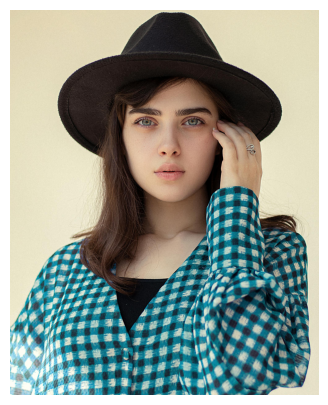

In [ ]:
visualize(img)

## Mixup transform

To use transform we need to define reference data that could be any sequence or generator.

We also need to defined `read_fn` that transforms items from `reference_data` to dictionaries with keys: `image`, and optional `global_label`, `mask`.

In [ ]:
reference_data = [{
    "image_path": "../images/cat1.jpeg",
    "class_id": 1},
                  {"image_path": "../images/tiger.jpeg",
    "class_id": 2}]


In [ ]:
def int_to_onehot(value, num_classes):
    """Convert an array of integers to one-hot representation.

    Args:
        values (np.ndarray): Array of integers to be converted.
        num_classes (int): Total number of classes, determines the length of one-hot vectors.

    Returns:
        np.ndarray: One-hot encoded representation of `values`.
    """
    # Initialize the one-hot encoded array of shape (num_classes,)
    one_hot = np.zeros(num_classes, dtype=int)

    # Set the appropriate index to one
    one_hot[value] = 1

    return one_hot

In [ ]:
NUM_CLASSES = 5

In [ ]:
target_height = 2500
target_width = 1800

In [ ]:
# We can process data as we want, including application of augmentations transform.

reference_aug = A.Compose([A.RandomCrop(width=target_width, height=target_height, p=1)], p=1)

In [ ]:
def read_fn(item):
    image = load_rgb(item["image_path"])

    transformed_image = reference_aug(image=image)["image"]

    global_label = int_to_onehot(item["class_id"], NUM_CLASSES)
    return {
        "image": transformed_image,
        "global_label": global_label
    }

## Show reference images

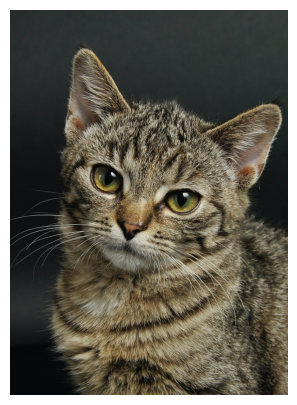

In [ ]:
visualize(read_fn(reference_data[0])["image"])

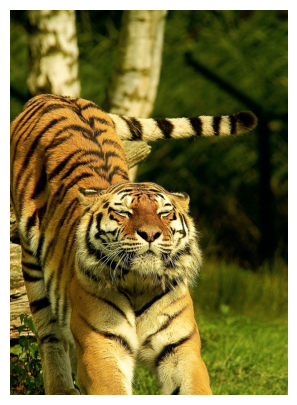

In [ ]:
visualize(read_fn(reference_data[1])["image"])

In [ ]:
transform = A.Compose([A.RandomCrop(width=target_width, height=target_height, p=1),
                                       A.MixUp(reference_data=reference_data,
                                              read_fn=read_fn, p=1),
                                      A.HorizontalFlip(p=1)], p=1)

In [ ]:
original_global_label = int_to_onehot(class_id, NUM_CLASSES)

Global label =  [0.894349 0.105651 0.       0.       0.      ]
Mixing coefficient =  0.8943490049245845


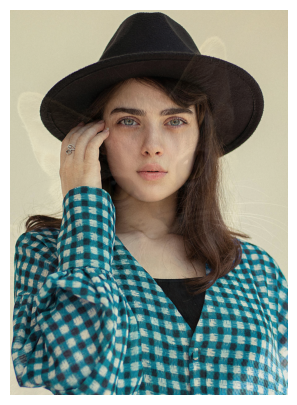

In [ ]:
transformed = transform(image=img, global_label=original_global_label)
print("Global label = ", transformed["global_label"])
print("Mixing coefficient = ", transformed["mix_coef"])

visualize(transformed["image"])

Global label =  [0.00142189 0.         0.99857811 0.         0.        ]
Mixing coefficient =  0.0014218885525450404


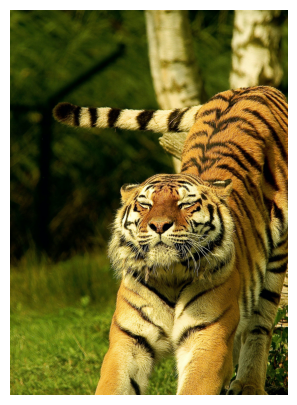

In [ ]:
transformed = transform(image=img, global_label=original_global_label)
print("Global label = ", transformed["global_label"])
print("Mixing coefficient = ", transformed["mix_coef"])

visualize(transformed["image"])

## What if you need to know image that was used for mixing?

In [ ]:
mix_data = transformed["mix_data"]

mixing_image = mix_data["image"]
global_label_of_mixing_image = mix_data["global_label"]